### Setting up

In [3]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import style
from matplotlib import pyplot as plt
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
display.display(tf.test.gpu_device_name())
pd.options.display.max_rows = 10
pd.set_option('display.float_format', lambda x: "%.1f" % x)
style.use('ggplot')

'/device:GPU:0'

### Load Dataset and Randomization and Encode Labels

In [4]:
breast_cancer_dataframe = pd.read_csv(
    'drive/ml_directory/biology/breast_cancer_uci/data.csv', sep=',')
breast_cancer_dataframe = breast_cancer_dataframe.drop('Unnamed: 32', axis=1)
breast_cancer_dataframe = breast_cancer_dataframe.drop('id', axis=1)
breast_cancer_dataframe = breast_cancer_dataframe.reindex(
    np.random.permutation(breast_cancer_dataframe.index))

breast_cancer_encoded_df = breast_cancer_dataframe
breast_cancer_encoded_df['diagnosis'] = breast_cancer_dataframe[
    'diagnosis'].apply(lambda x: 1 if x == 'B' else 0)
display.display(breast_cancer_encoded_df.head(5))
display.display(breast_cancer_encoded_df.describe())
display.display(breast_cancer_encoded_df.info())

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
10,0,16.0,23.2,102.7,797.8,0.1,0.1,0.0,0.0,0.2,...,19.2,33.9,123.8,1150.0,0.1,0.2,0.1,0.1,0.3,0.1
416,1,9.4,21.7,59.6,271.2,0.1,0.1,0.0,0.0,0.2,...,10.8,31.2,68.7,359.4,0.2,0.1,0.1,0.0,0.3,0.1
373,0,20.6,17.4,134.8,1335.0,0.1,0.1,0.2,0.1,0.2,...,25.4,23.2,166.8,1946.0,0.2,0.3,0.4,0.2,0.3,0.1
495,1,14.9,20.2,96.1,680.9,0.1,0.1,0.1,0.0,0.1,...,16.0,28.5,103.9,783.6,0.1,0.1,0.2,0.1,0.2,0.1
364,1,13.4,16.9,85.5,552.4,0.1,0.1,0.0,0.0,0.2,...,14.7,21.7,93.8,663.5,0.1,0.2,0.1,0.1,0.3,0.1


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,...,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0
mean,0.6,14.1,19.3,92.0,654.9,0.1,0.1,0.1,0.0,0.2,...,16.3,25.7,107.3,880.6,0.1,0.3,0.3,0.1,0.3,0.1
std,0.5,3.5,4.3,24.3,351.9,0.0,0.1,0.1,0.0,0.0,...,4.8,6.1,33.6,569.4,0.0,0.2,0.2,0.1,0.1,0.0
min,0.0,7.0,9.7,43.8,143.5,0.1,0.0,0.0,0.0,0.1,...,7.9,12.0,50.4,185.2,0.1,0.0,0.0,0.0,0.2,0.1
25%,0.0,11.7,16.2,75.2,420.3,0.1,0.1,0.0,0.0,0.2,...,13.0,21.1,84.1,515.3,0.1,0.1,0.1,0.1,0.3,0.1
50%,1.0,13.4,18.8,86.2,551.1,0.1,0.1,0.1,0.0,0.2,...,15.0,25.4,97.7,686.5,0.1,0.2,0.2,0.1,0.3,0.1
75%,1.0,15.8,21.8,104.1,782.7,0.1,0.1,0.1,0.1,0.2,...,18.8,29.7,125.4,1084.0,0.1,0.3,0.4,0.2,0.3,0.1
max,1.0,28.1,39.3,188.5,2501.0,0.2,0.3,0.4,0.2,0.3,...,36.0,49.5,251.2,4254.0,0.2,1.1,1.3,0.3,0.7,0.2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 10 to 503
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave_points_se          569 n

None

### Preprocess Data

In [5]:
all_features = list(breast_cancer_encoded_df)
all_features.remove('diagnosis')
print(all_features)


def preprocess_features(breast_cancer_encoded_df):
    selected_features = breast_cancer_encoded_df[all_features]
    processed_features = selected_features.copy()
    return processed_features


def preprocess_targets(breast_cancer_encoded_df):
    output_targets = pd.DataFrame()
    output_targets['diagnosis'] = breast_cancer_encoded_df['diagnosis']
    return output_targets

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']


### Training set, Validation set and Testing set

In [6]:
training_examples = preprocess_features(breast_cancer_encoded_df[0:300])
display.display(training_examples.describe())
training_targets = preprocess_targets(breast_cancer_encoded_df[0:300])
display.display(training_targets.describe())

validation_examples = preprocess_features(breast_cancer_encoded_df[300:419])
display.display(validation_examples.describe())
validation_targets = preprocess_targets(breast_cancer_encoded_df[300:419])
display.display(validation_targets.describe())

test_examples = preprocess_features(breast_cancer_encoded_df[419:])
test_targets = preprocess_targets(breast_cancer_encoded_df[419:])
print(len(test_examples))
print(len(test_targets))

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
mean,13.9,19.0,90.6,633.6,0.1,0.1,0.1,0.0,0.2,0.1,...,16.0,25.2,105.2,845.6,0.1,0.2,0.3,0.1,0.3,0.1
std,3.3,4.5,23.0,320.2,0.0,0.0,0.1,0.0,0.0,0.0,...,4.6,6.4,32.2,527.4,0.0,0.2,0.2,0.1,0.1,0.0
min,7.0,9.7,43.8,143.5,0.1,0.0,0.0,0.0,0.1,0.0,...,7.9,12.0,50.4,185.2,0.1,0.0,0.0,0.0,0.2,0.1
25%,11.7,15.8,74.7,420.3,0.1,0.1,0.0,0.0,0.2,0.1,...,13.0,20.3,83.8,511.8,0.1,0.1,0.1,0.1,0.3,0.1
50%,13.1,18.4,84.8,535.8,0.1,0.1,0.1,0.0,0.2,0.1,...,14.7,25.0,96.7,662.3,0.1,0.2,0.2,0.1,0.3,0.1
75%,15.6,21.7,103.2,750.1,0.1,0.1,0.1,0.1,0.2,0.1,...,18.0,28.9,121.9,982.0,0.1,0.3,0.4,0.2,0.3,0.1
max,25.7,39.3,174.2,2010.0,0.1,0.3,0.4,0.2,0.3,0.1,...,33.1,49.5,229.3,3234.0,0.2,1.1,1.2,0.3,0.6,0.2


,diagnosis
count,300.0
mean,0.7
std,0.5
min,0.0
25%,0.0
50%,1.0
75%,1.0
max,1.0


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,119.0,119.0,119.0,119.0,119.0,119.0,119.0,119.0,119.0,119.0,...,119.0,119.0,119.0,119.0,119.0,119.0,119.0,119.0,119.0,119.0
mean,14.6,19.8,95.0,704.1,0.1,0.1,0.1,0.1,0.2,0.1,...,16.9,26.2,111.7,963.3,0.1,0.3,0.3,0.1,0.3,0.1
std,3.9,4.0,26.8,416.7,0.0,0.0,0.1,0.0,0.0,0.0,...,5.3,5.9,36.8,668.0,0.0,0.1,0.2,0.1,0.1,0.0
min,8.2,12.2,53.3,203.9,0.1,0.0,0.0,0.0,0.1,0.1,...,9.1,15.4,58.1,249.8,0.1,0.1,0.0,0.0,0.2,0.1
25%,11.7,17.0,75.5,426.6,0.1,0.1,0.0,0.0,0.2,0.1,...,13.1,22.1,85.1,518.5,0.1,0.2,0.1,0.1,0.3,0.1
50%,13.6,19.5,88.0,575.3,0.1,0.1,0.1,0.0,0.2,0.1,...,15.1,25.5,98.8,706.0,0.1,0.2,0.3,0.1,0.3,0.1
75%,16.3,22.1,107.8,823.3,0.1,0.1,0.1,0.1,0.2,0.1,...,20.3,30.4,133.9,1265.0,0.1,0.4,0.5,0.2,0.3,0.1
max,28.1,31.1,188.5,2501.0,0.1,0.2,0.4,0.2,0.3,0.1,...,36.0,47.2,251.2,4254.0,0.2,0.7,0.8,0.3,0.5,0.1


,diagnosis
count,119.0
mean,0.6
std,0.5
min,0.0
25%,0.0
50%,1.0
75%,1.0
max,1.0


150
150


### Construct Feature Columns

In [0]:
def construct_feature_columns(input_features):
    return set([
        tf.feature_column.numeric_column(my_feature)
        for my_feature in input_features
    ])

### Input Functions

In [0]:
def _input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    features = {key: np.array(value) for key, value in dict(features).items()}
    ds = Dataset.from_tensor_slices((features, targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    if shuffle:
        ds = ds.shuffle(buffer_size=100)
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

### Train Linear Classification Model

In [0]:
def train_linear_classfication_model(learning_rate, steps, batch_size,
                                     training_examples, training_targets,
                                     validation_examples, validation_targets):

    periods = 10
    steps_per_period = steps / periods

    # Create linear_classifier object and configure it.
    my_optimizer = tf.train.FtrlOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(
        my_optimizer, 5.0)
    linear_classifier = tf.estimator.LinearClassifier(
        feature_columns=construct_feature_columns(training_examples),
        optimizer=my_optimizer)

    # Input functions
    training_input_fn = lambda: _input_fn(
        training_examples,
        training_targets['diagnosis'],
        batch_size=batch_size)
    predict_training_input_fn = lambda: _input_fn(
        training_examples,
        training_targets['diagnosis'],
        shuffle=False,
        num_epochs=1)
    predict_validation_input_fn = lambda: _input_fn(
        validation_examples,
        validation_targets['diagnosis'],
        shuffle=False,
        num_epochs=1)

    # Train the model in loop
    print("Training model...")
    print("  LogLoss (on training data & validation data): ")
    training_error = []
    validation_error = []
    for period in range(0, periods):
        linear_classifier.train(
            input_fn=training_input_fn, steps=steps_per_period)

        # Compute predcitions
        training_probabilities = linear_classifier.predict(
            input_fn=predict_training_input_fn)
        training_probabilities = np.array(
            [item['probabilities'] for item in training_probabilities])
        validation_probabilities = linear_classifier.predict(
            input_fn=predict_validation_input_fn)
        validation_probabilities = np.array(
            [item['probabilities'] for item in validation_probabilities])

        training_log_loss = metrics.log_loss(training_targets,
                                             training_probabilities)
        validation_log_loss = metrics.log_loss(validation_targets,
                                               validation_probabilities)
        print("    Period {:02d} : {:.2f}\t{:.2f}".format(
            period, training_log_loss, validation_log_loss))
        training_error.append(training_log_loss)
        validation_error.append(validation_log_loss)
    print("Model training finished.")

    print("Final LogLoss (on training data): {:.5f}".format(training_log_loss))
    print("Final LogLoss (on validation data): {:.5f}\n".format(
        validation_log_loss))

    final_predictions = linear_classifier.predict(
        input_fn=predict_validation_input_fn)
    final_predictions = np.array(
        [item['class_ids'][0] for item in final_predictions])

    accuracy = metrics.accuracy_score(validation_targets, final_predictions)
    print("Final accuracy (on validation data): {:.2f}".format(accuracy))

    plt.ylabel("LogLoss")
    plt.xlabel("Periods")
    plt.title("LogLoss vs. Periods")
    plt.tight_layout()
    plt.plot(training_error, label="training", color="magenta")
    plt.plot(validation_error, label="validation", color="g")
    plt.legend()
    return linear_classifier

Training model...
  LogLoss (on training data & validation data): 
    Period 00 : 0.69	0.69
    Period 01 : 0.69	0.69
    Period 02 : 0.69	0.68
    Period 03 : 0.68	0.68
    Period 04 : 0.68	0.68
    Period 05 : 0.68	0.68
    Period 06 : 0.68	0.68
    Period 07 : 0.68	0.68
    Period 08 : 0.68	0.67
    Period 09 : 0.68	0.67
Model training finished.
Final LogLoss (on training data): 0.67728
Final LogLoss (on validation data): 0.67407

Final accuracy (on validation data): 0.91


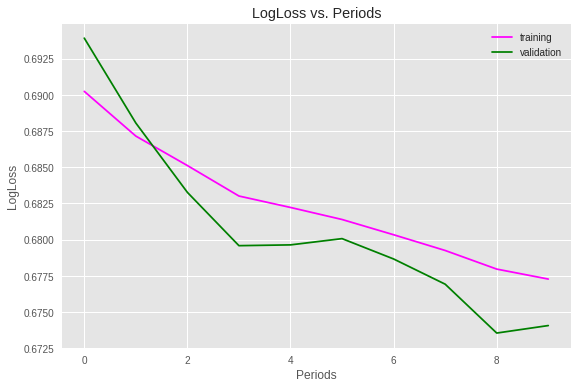

In [15]:
linear_classifier = train_linear_classfication_model(
    learning_rate=0.00002,
    steps=500,
    batch_size=3,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

In [16]:
predict_test_input_fn = lambda: _input_fn(test_examples,
                                          test_targets['diagnosis'],
                                          shuffle=False,
                                          num_epochs=1)
test_probabilities = linear_classifier.predict(input_fn=predict_test_input_fn)
test_probabilities = np.array(
    [item['probabilities'] for item in test_probabilities])

test_log_loss = metrics.log_loss(test_targets, test_probabilities)
print("LogLoss (on testing data): {:.5f}".format(test_log_loss))

LogLoss (on testing data): 0.67670
